TODO LIST  
>一张图放不下超过20个数据，应该多画几张图

In [2]:
import platform
import matplotlib.pyplot as plt
import pandas as pd
os_name = platform.system()
if(os_name == "Darwin"):
    #MacOS
    plt.rcParams['font.family'] = 'sans-serif'    
    plt.rcParams['font.sans-serif'] = ['Heiti TC']
else:
    #maybe Windows
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
data = pd.read_csv('./data.csv',index_col = 0 )
'''
如果上一行是 `data = pd.read_csv('./data.csv')`
可以在这里加一行`data.set_index('date')`达到相同效果
'''

index = data.index #有了上一行之后 这里使用data.date就会报错了
data

,卧推(kg*12x3),硬拉(kg*8x3),有氧描述,有氧时长(min),深蹲(kg*8x3),高脚杯深蹲(kg*8x3)
date,,,,,,
2025/2/28,12.0,15.0,放松慢跑,15.0,NaN,NaN
2025/3/1,NaN,20.0,慢跑,30.0,NaN,NaN
2025/3/2,20.0,NaN,慢跑,17.0,30.0,NaN
2025/3/4,20.0,30.0,慢跑,20.0,NaN,NaN
2025/3/5,NaN,30.0,慢跑,21.0,30.0,NaN
...,...,...,...,...,...,...
2026/1/9,NaN,NaN,羽毛球,120.0,NaN,NaN
2026/1/12,NaN,85.0,NaN,NaN,NaN,25.0
2026/1/18,NaN,NaN,羽毛球,120.0,NaN,NaN


In [3]:
#在后续绘制中隐去年份信息 因为太长了
length = len(index)
new_index = []
for i in range(length):
    date = index[i]
    date = date[5:len(date)]
    new_index.append(date)
data.index = new_index

def myPlot(_data, _title, _ylabel):
    _data = _data.dropna()
    _index = _data.index
    plt.scatter(_index, _data)
    plt.title(_title)
    plt.ylabel(_ylabel)
    for i in range(len(_index)):
        plt.annotate(str(_data.iloc[i]), (_index[i], _data.iloc[i] + 0.2), ha='center')
    plt.show()

In [4]:
# myPlot(data.iloc[:,0], "卧推重量", "千克")

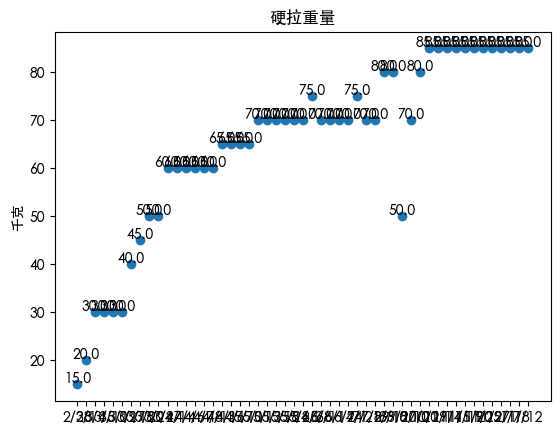

In [5]:
myPlot(data.iloc[:,1], "硬拉重量", "千克")

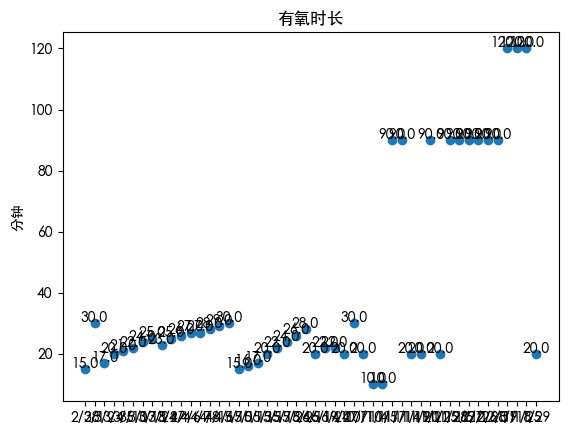

In [6]:
myPlot(data.iloc[:,3], "有氧时长", "分钟")

In [7]:
# myPlot(data.iloc[:,4], "深蹲重量", "千克")

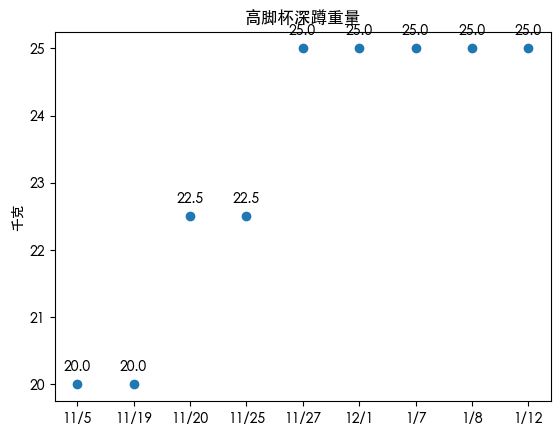

In [8]:
myPlot(data.iloc[:,5], "高脚杯深蹲重量", "千克")

In [9]:
# myPlot(data.iloc[:,6], "斜板推举", "千克")